<a href="https://colab.research.google.com/github/akashmandhotra5/Teleco-Customer-Churn-Analysis-/blob/main/Customer_churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Data_science/Project/customer_churn/customer_churn.csv")

# Once the data is loaded, perform an initial analysis to understand its structure and characteristics.

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# **Data Cleaning**

In [20]:
# check for missing or duplicate values
print(df.isnull().sum().sum())
print(df.duplicated().sum())

0
0


In [9]:
# also entire rows and on index
df['customerID'].duplicated().sum()

0

In [10]:
# convert 0 to no and 1 to yes
df['SeniorCitizen'] = df['SeniorCitizen'].map({0:'no',1:'yes'})
df['SeniorCitizen']

,SeniorCitizen
0,no
1,no
2,no
3,no
4,no
...,...
7038,no
7039,no
7040,no
7041,yes


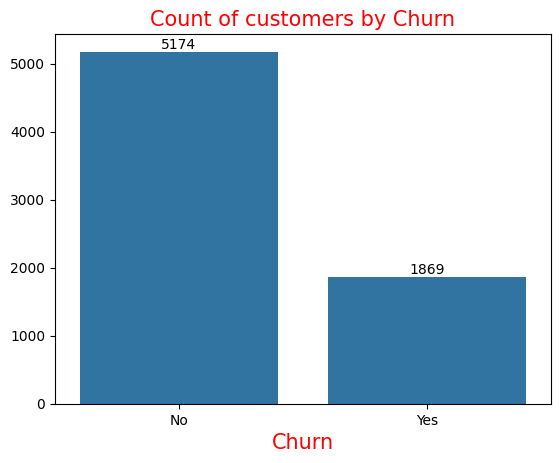

In [36]:
ax = sns.countplot(x='Churn', data=df)
plt.title("Count of customers by Churn",color="red",size=15)
ax.bar_label(ax.containers[0])
ax.set_ylabel("")
plt.xlabel("Churn",color="red",size=15)
plt.show()

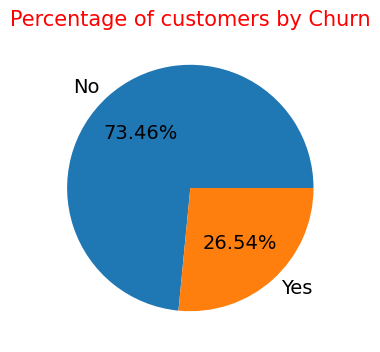

In [29]:
plt.figure(figsize=(4,4))
gb_churn = df.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb_churn['Churn'],labels=gb_churn .index,autopct='%1.2f%%', textprops={"fontsize": 14})
plt.title("Percentage of customers by Churn",fontsize=15,color="red")
plt.show()

**Conclusion**


---


The analysis of customer churn using a pie chart indicates that 25.54% of the customers have churned out. This churn rate represents a significant portion of the customer base, indicating potential underlying issues that need further investigation.


---


To gain deeper insights into customer attrition, lets find out the reason behind this


In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


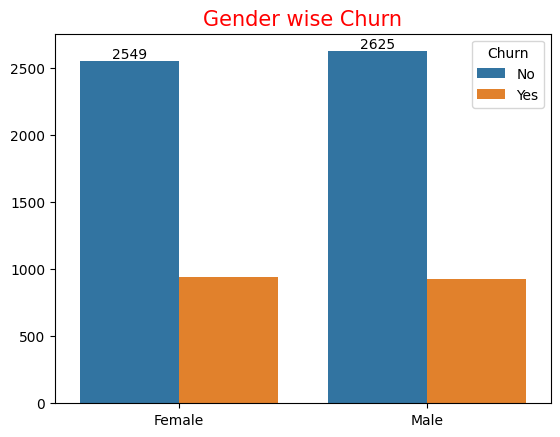

In [38]:
ax = sns.countplot(data=df,x="gender",hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Gender wise Churn" , fontsize=15,color="red")
ax.set_ylabel("")
ax.set_xlabel("")
plt.show()


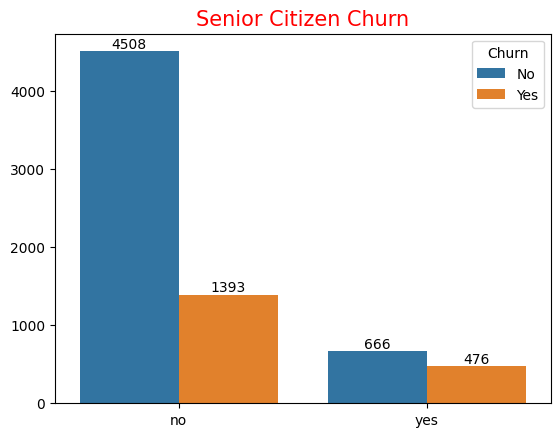

In [118]:
# plt.figure(figsize=(3,3))
ax = sns.countplot(data=df,x='SeniorCitizen',hue='Churn')
plt.title("Senior Citizen Churn" , fontsize=15,color="red")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.set_xlabel("")
ax.set_ylabel("")
plt.show()

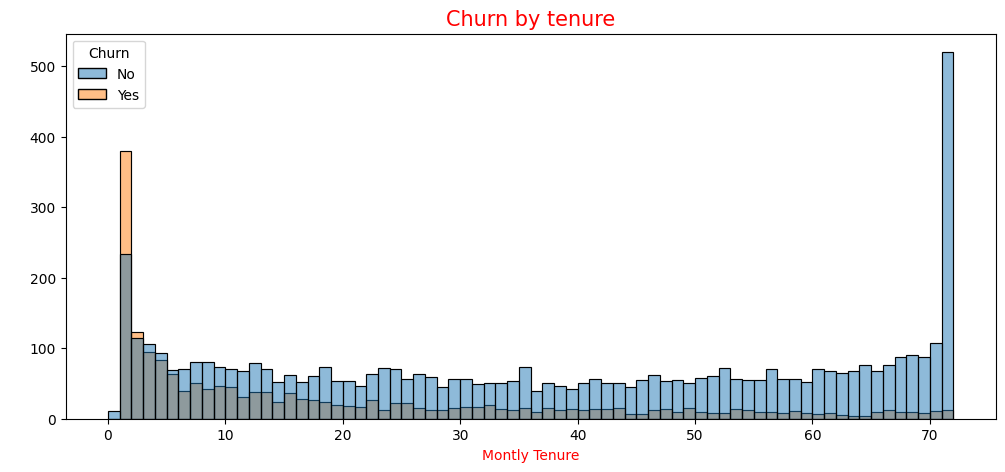

In [120]:
plt.figure(figsize=(12,5))
ax = sns.histplot(x='tenure', data=df,bins=72 ,hue="Churn")
plt.title("Churn by tenure" , fontsize=15,color="red")
ax.set_xlabel("Montly Tenure", color="red")
ax.set_ylabel(" ")
plt.show()

**Conclusion**


---


The data indicates that customers who have engaged with our services for an extended period tend to remain, whereas those with shorter usage durations (1-2 months) exhibit higher churn rates.

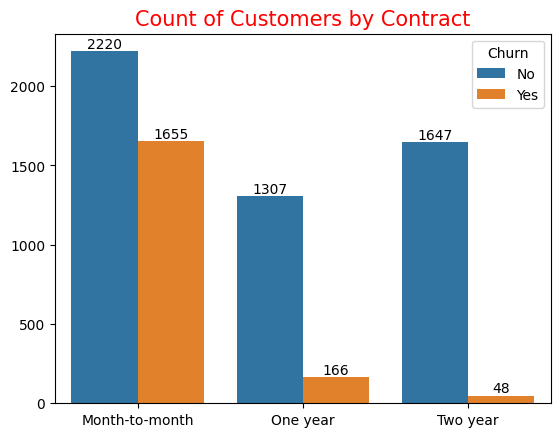

In [89]:
# plt.figure(figsize=(3,3))
ax = sns.countplot(data=df,x='Contract',hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Customers by Contract" , fontsize=15,color="red")
ax.set_xlabel("", color="red")
ax.set_ylabel("")
plt.show()

**Conclusion**


---


Customers who have been with our services for over a year are more likely to stay, while those who have joined for only a few months are more likely to churn.

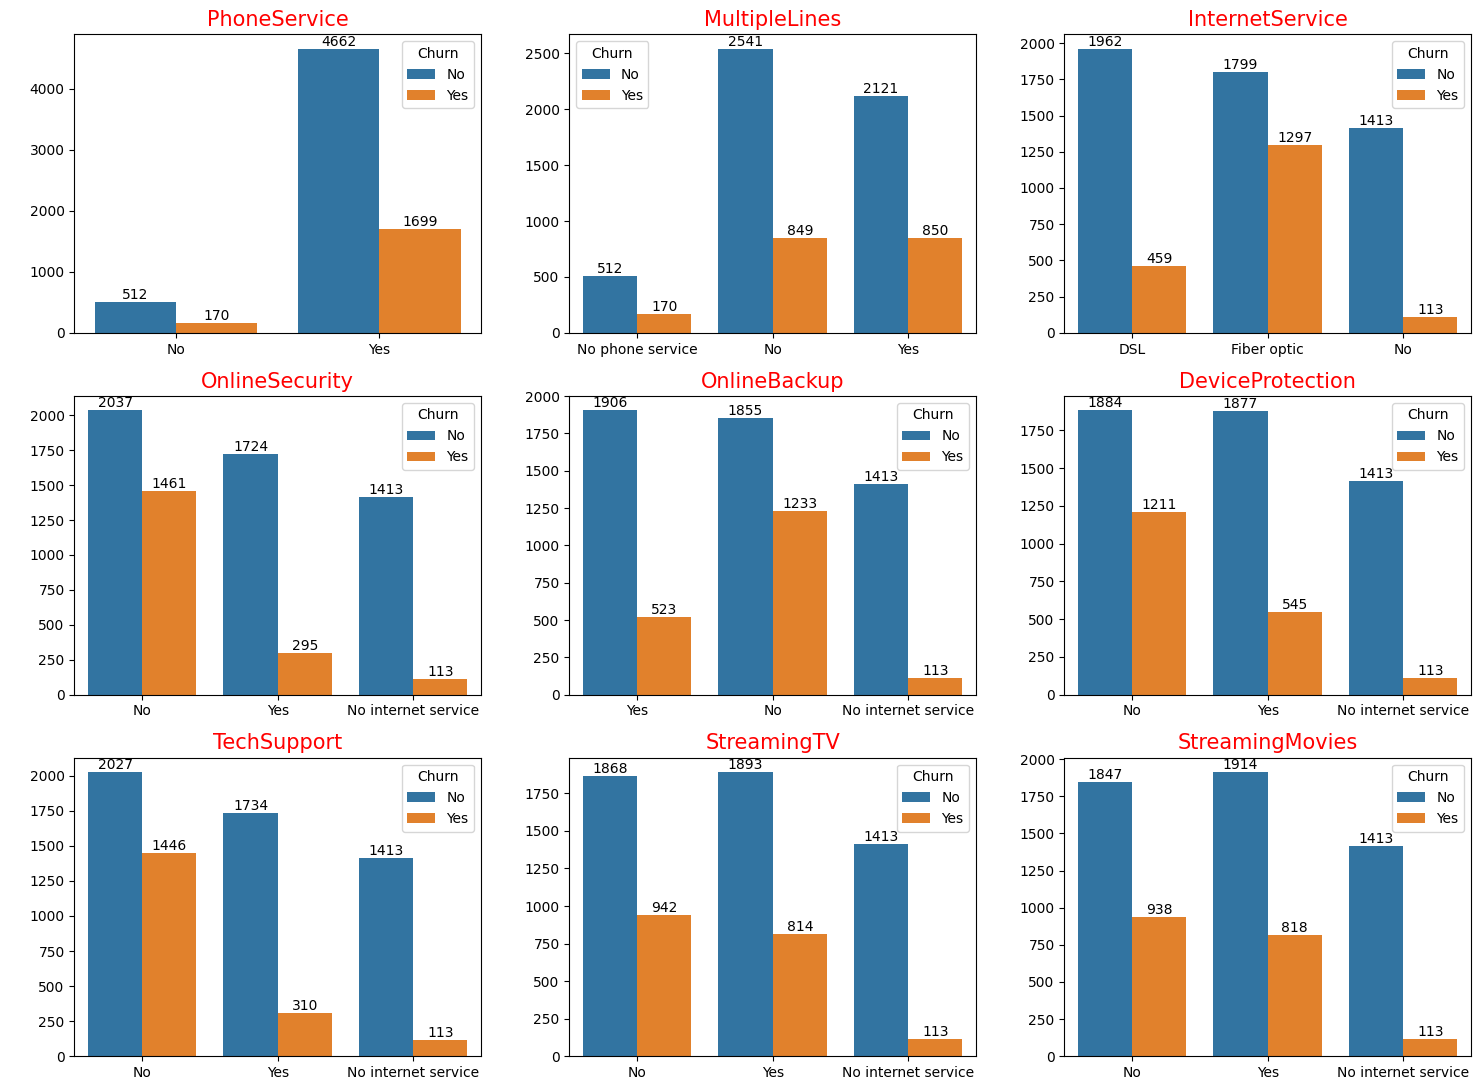

In [95]:
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of rows and columns for subplots
rows = 3  # Adjust based on your preference
cols = 3  # Adjust based on your preference

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 11))  # Adjust figure size
axes = axes.flatten()  # Flatten the 2D array of axes

# Loop through columns and create count plots
for i, col in enumerate(columns):
    ax = axes[i]  # Select subplot
    sns.countplot(data=df, x=col, ax=ax,hue="Churn")  # Countplot
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    ax.set_title(col, fontsize=15, color="red")  # Title
    ax.set_xlabel("")  # Remove x-axis label
    ax.set_ylabel(" ")  # Set y-axis label

# Adjust layout
plt.tight_layout()
plt.show()

**Overall Insights:**


---


	Internet service type plays a crucial role, with fiber optic users showing higher churn.
	Additional support services (tech support, online security, and backup) contribute to customer retention.
	Basic phone service alone does not prevent churn, as a large portion of users with phone service still leave.
	Customers who lack security or support features are more likely to churn.


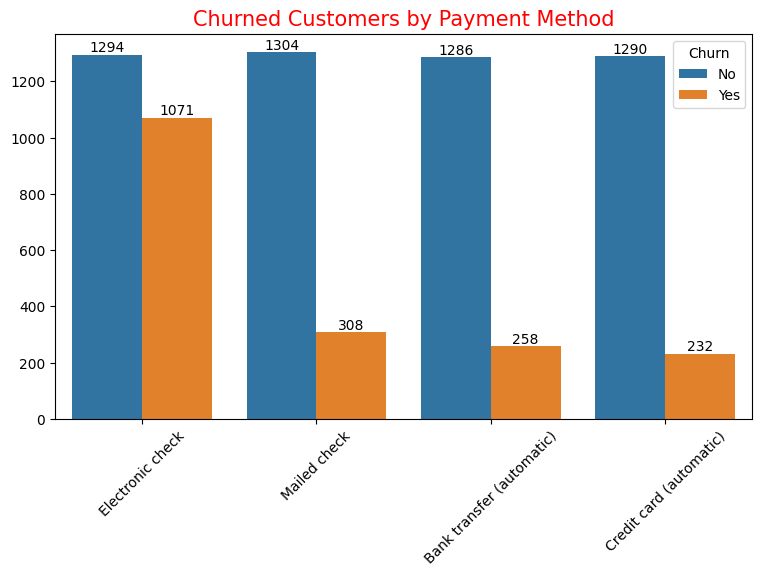

In [115]:
plt.figure(figsize=(9,5))
ax = sns.countplot(data = df, x="PaymentMethod",hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method" , fontsize=15,color="red")
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("")
plt.show()